# Exploratory data analysis

The Exploratory data analysis will only be done on the training data.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from tqdm import tqdm

## Read the training data

In [2]:
train_df = pd.read_csv('data/train.csv', sep=',', encoding='utf-8')
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
len(train_df)

33600

## Target distribution

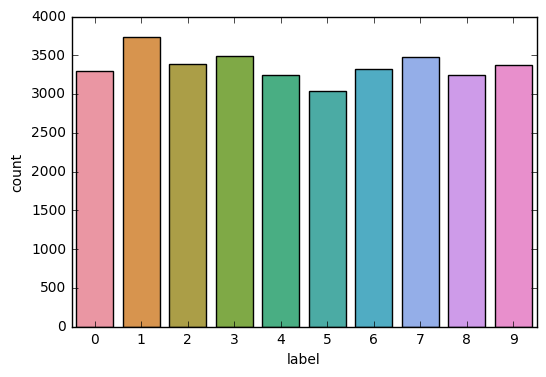

In [4]:
sns.countplot(train_df['label'])
plt.show()

Quite balanced.

## View some images

In [5]:
def dispay_image(row):
    """row is a 1D numpy array of int."""
    plt.imshow(255 - row.reshape(28, 28), cmap='gray', vmin=0, vmax=255)
    plt.show()
    return None

In [38]:
def display_images_of_specific_label(label, n_images=1):
    n_cols = 3
    
    samples_of_interest_df = train_df.loc[train_df['label'] == label]
    samples_of_interest_df = samples_of_interest_df.drop(['label'], axis=1).copy()
    n_images = min(n_images, len(samples_of_interest_df))
    samples_of_interest_df = samples_of_interest_df.sample(n_images)
    
    n_rows = int((n_images - 1) / n_cols) + 1
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
    for i, (_, row) in enumerate(samples_of_interest_df.iterrows()):
        if n_rows > 1:
            ax = axes[int(i / n_cols), i % n_cols]
        else:
            ax = axes[i % n_cols]
        ax.axis('off')
        ax.imshow(255 - row.values.reshape(28, 28), cmap='gray', vmin=0, vmax=255)
    
    return None

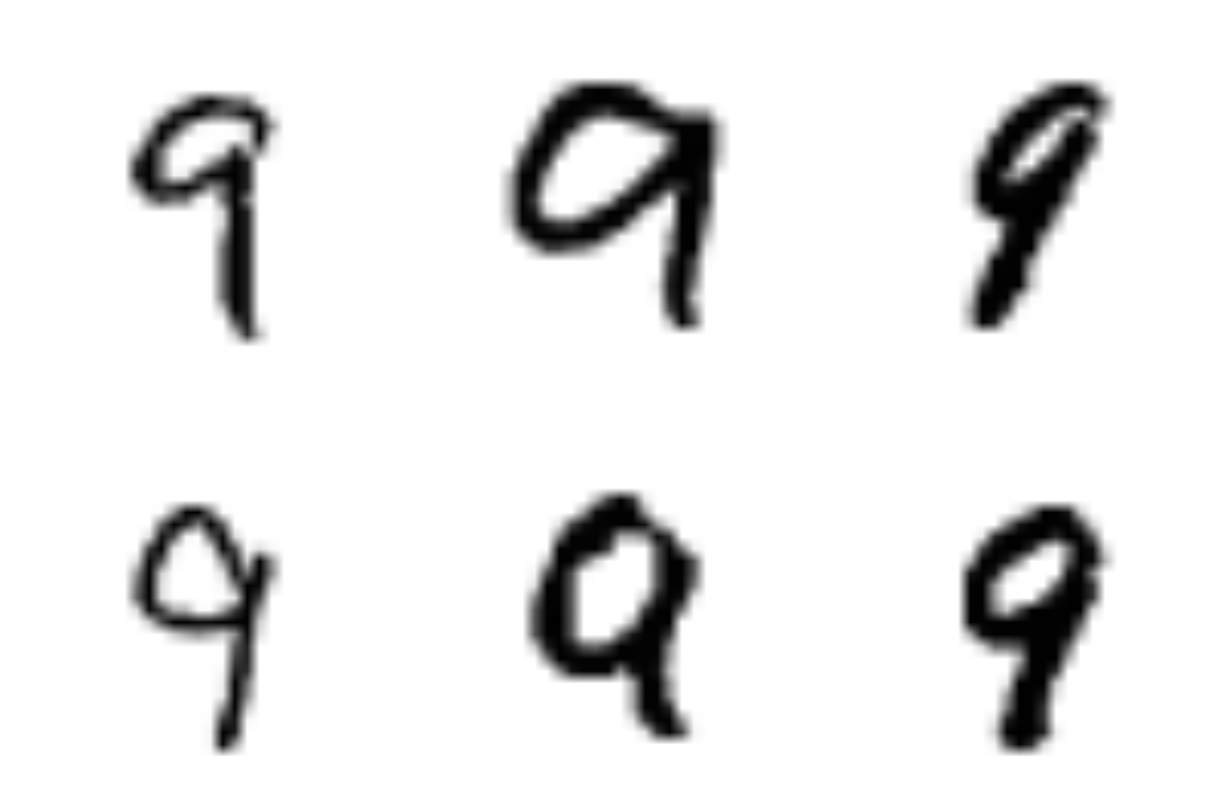

In [39]:
display_images_of_specific_label(9, 6)